## Імпорти

In [10]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings

warnings.filterwarnings('ignore')

#### Завантаження даних

In [11]:
sns.set_theme(style="whitegrid")
plt.rcParams['figure.figsize'] = (12, 6)

df = pd.read_csv('accident_clear_data.csv', sep=';')

ukr_days_order = [
    'понеділок', 'вівторок', 'середа', 'четвер',
    "п'ятниця", 'субота', 'неділя'
]

df['accidentDay'] = pd.Categorical(
    df['accidentDay'],
    categories=ukr_days_order,
    ordered=True
)

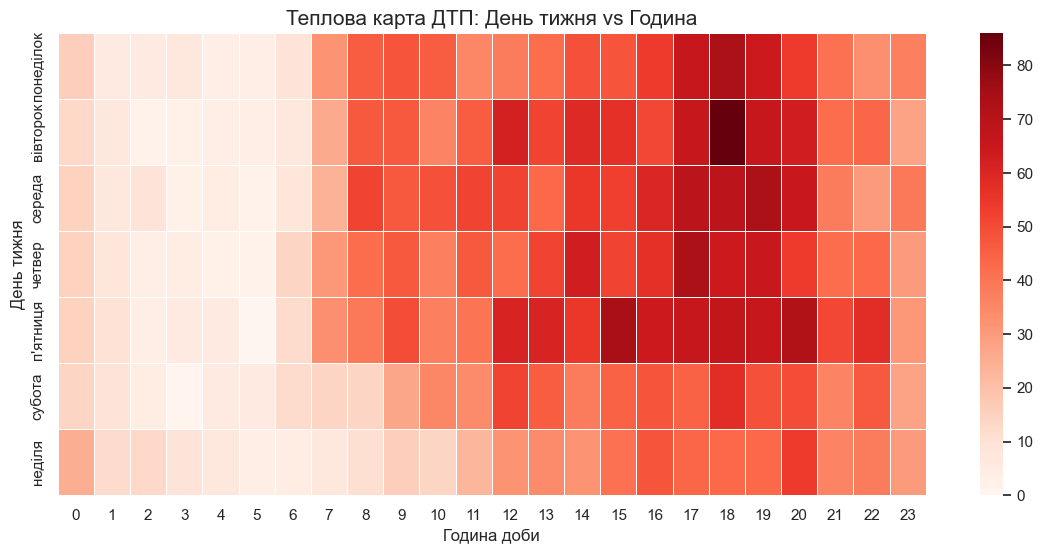

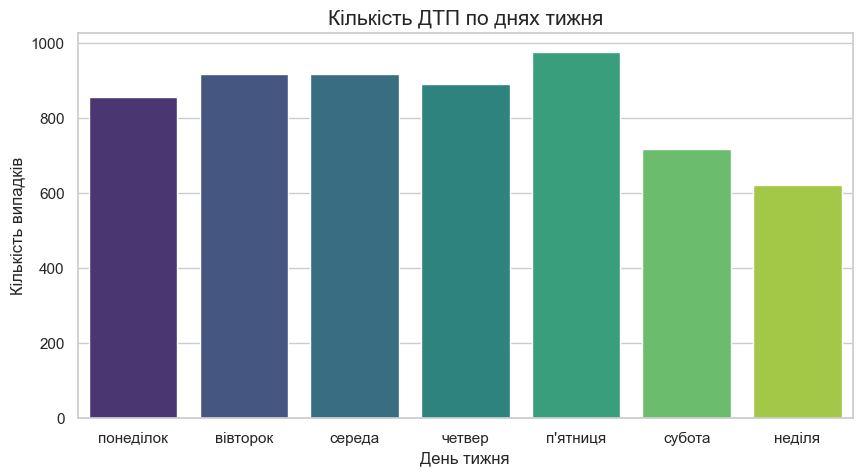

In [12]:
# --- Графік 1: Теплова карта (Heatmap) ---
# Створюємо зведену таблицю: рядки - дні, стовпці - години, значення - кількість
pivot_table = df.pivot_table(index='accidentDay', columns='Hour', values='settlement', aggfunc='count')

plt.figure(figsize=(14, 6))
sns.heatmap(pivot_table, cmap='Reds', linecolor='white', linewidths=0.5)
plt.title('Теплова карта ДТП: День тижня vs Година', fontsize=15)
plt.ylabel('День тижня')
plt.xlabel('Година доби')
plt.show()

# --- Графік 2: Загальна кількість по днях ---
plt.figure(figsize=(10, 5))
sns.countplot(data=df, x='accidentDay', palette='viridis')
plt.title('Кількість ДТП по днях тижня', fontsize=15)
plt.xlabel('День тижня')
plt.ylabel('Кількість випадків')
plt.show()

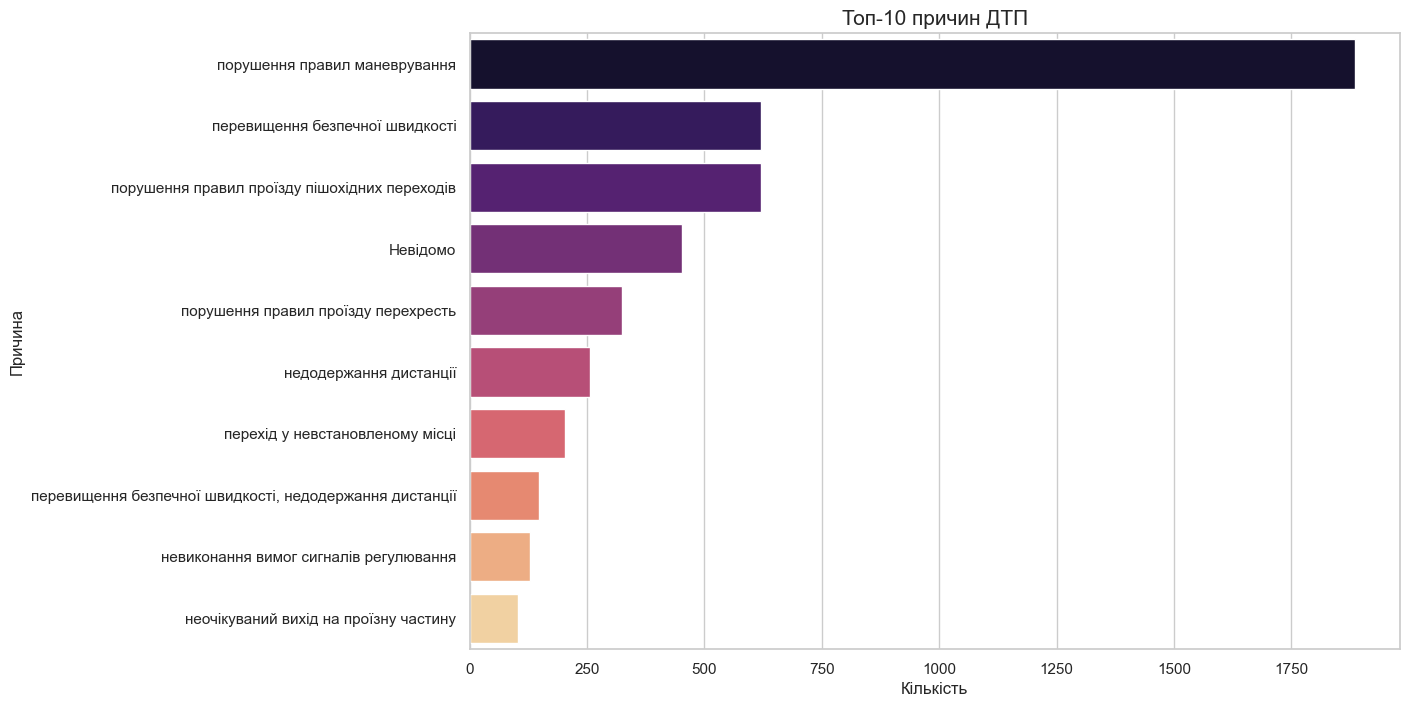

In [13]:
top_causes = df['mainAccidentCause'].value_counts().head(10)

plt.figure(figsize=(12, 8))
sns.barplot(y=top_causes.index, x=top_causes.values, palette='magma')
plt.title('Топ-10 причин ДТП', fontsize=15)
plt.xlabel('Кількість')
plt.ylabel('Причина')
plt.show()

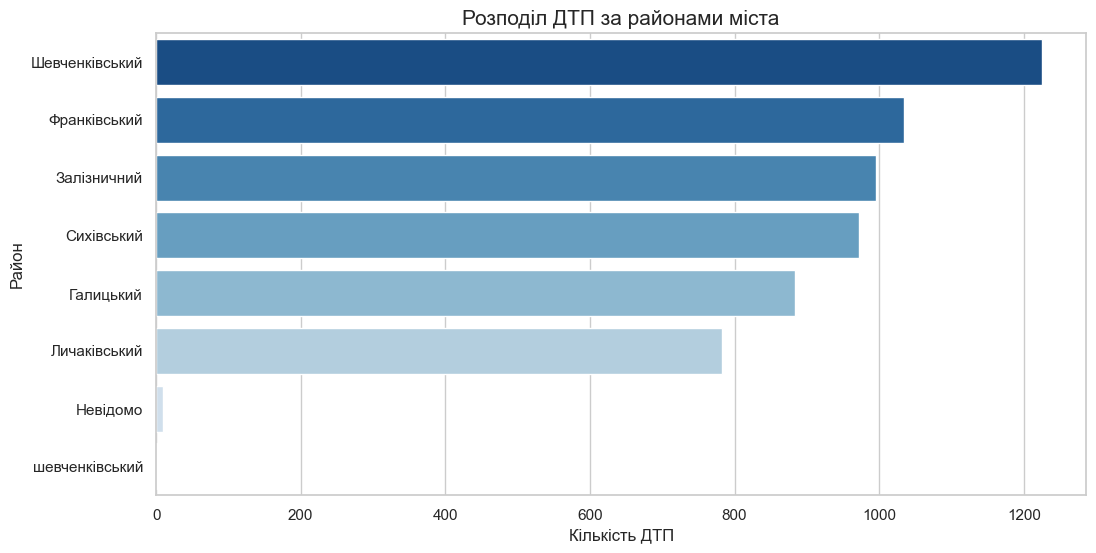

In [14]:
district_counts = df['district'].value_counts()

plt.figure(figsize=(12, 6))
sns.barplot(x=district_counts.values, y=district_counts.index, palette='Blues_r')

plt.title('Розподіл ДТП за районами міста', fontsize=15)
plt.xlabel('Кількість ДТП')
plt.ylabel('Район')
plt.show()

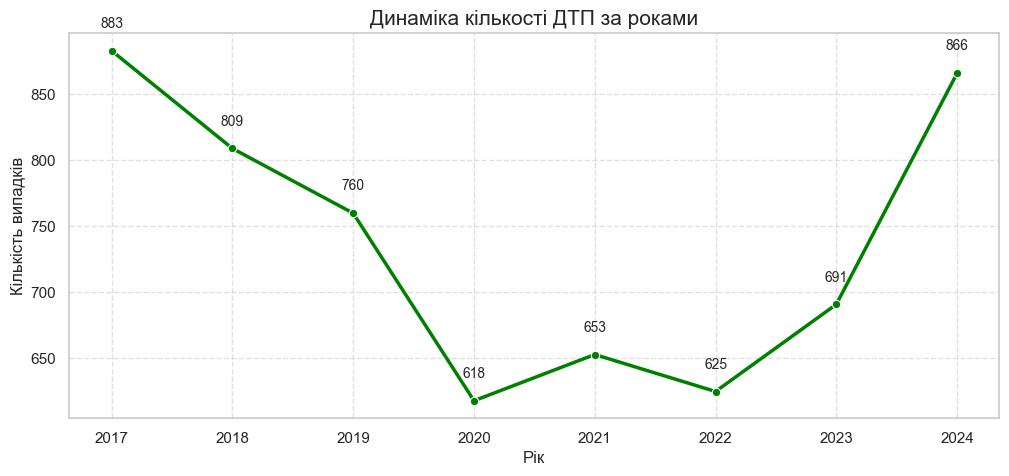

In [15]:
yearly_counts = df['Year'].value_counts().sort_index()

plt.figure(figsize=(12, 5))
sns.lineplot(x=yearly_counts.index, y=yearly_counts.values, marker='o', linewidth=2.5, color='green')

for x, y in zip(yearly_counts.index, yearly_counts.values):
    plt.text(x, y + 15, f'{y}', ha='center', va='bottom', fontsize=10)

plt.title('Динаміка кількості ДТП за роками', fontsize=15)
plt.xlabel('Рік')
plt.ylabel('Кількість випадків')
plt.xticks(yearly_counts.index)
plt.grid(True, linestyle='--', alpha=0.6)
plt.show()